In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 



In [32]:
dft = pd.read_excel(r"data\Nifty-17_Years_Data-V1.xlsx", parse_dates=True, 
    index_col=0, header=0)


In [50]:
dft_s = dft.resample('M')



In [52]:
dfn = dft_s['Open'].agg(['max', 'min'])
dfn['diff'] = dfn['max']-dfn['min']
dfn['diff'].loc[dfn['diff'] == dfn['diff'].max()].index.year


Int64Index([2008], dtype='int64', name='Date')

In [98]:
from statsmodels.graphics.tsaplots import *
lag_acf = 100
lag_pacf = 100
height = 4
width = 12

In [99]:
ts = dft.loc[:, "Close"].asfreq("D", method='ffill')
def plot_cf(ts):
    f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
    plot_acf(ts.values.squeeze(),lags=lag_acf, ax=ax[0])
    plot_pacf(ts.values.squeeze(),lags=lag_pacf, ax=ax[1])


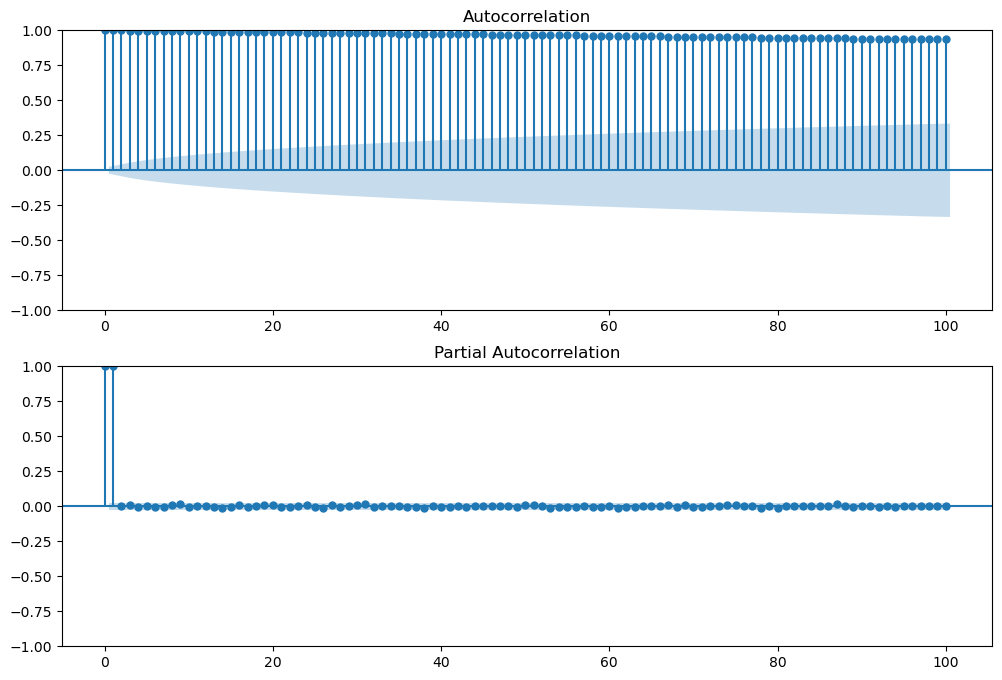

In [100]:
plot_cf(ts)



In [72]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [73]:
from pmdarima.arima.stationarity import ADFTest


In [75]:
adf_test = ADFTest(alpha=0.05)
p_val, should_diff = adf_test.should_diff(ts.values.squeeze())


In [76]:
p_val, should_diff

(0.26697688815303694, True)

In [77]:
from pmdarima.arima.utils import ndiffs

# Estimate the number of differences using an ADF test:
n_adf = ndiffs(ts.values.squeeze(), test='adf')
n_adf

1

In [78]:
import pmdarima as pm
pm.tsdisplay(ts.values.squeeze(), lag_max=90, title="Stocks CLose", show=True)


C:\Anaconda310\envs\aiml\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


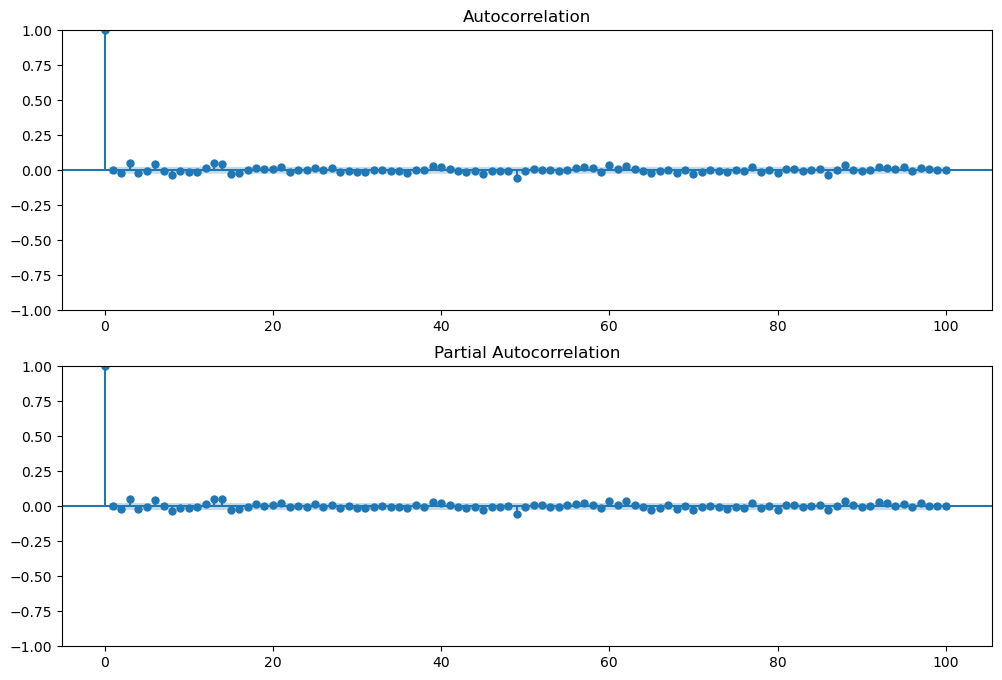

In [101]:
ts_log = np.log(ts)
ts_log_diff_1 = ts_log.diff(periods=1).dropna()
plot_cf(ts_log_diff_1)

In [102]:
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
ts = dft.Close
data = ts.values.squeeze()
train, test = model_selection.train_test_split(data, train_size=.95)



In [103]:
test.shape

(220,)

In [106]:
modl1 = pm.auto_arima(train, start_p=1, start_q=1, d=1, max_d=2,
                     max_p=3, max_q=2, seasonal=False,
                     stepwise=True, suppress_warnings=True, 
                     error_action='ignore')

In [89]:
type(modl1)

pmdarima.arima.arima.ARIMA

In [107]:
modl1

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [122]:
data = ts.values.squeeze()
train, test = model_selection.train_test_split(data, train_size=.99)
dates = ts.index.values.squeeze()
train_d, test_d = model_selection.train_test_split(dates, train_size=.99)


In [123]:
test_d.shape, test.shape

((44,), (44,))

In [124]:
modl1 = pm.auto_arima(train, start_p=1, start_q=1, d=1, max_d=2,
                     max_p=3, max_q=2, seasonal=False,
                     stepwise=True, suppress_warnings=True, 
                     error_action='ignore')
#modl = pmdarima.arima.arima.ARIMA

def model_predict(model, train, test):
    preds, conf_int = model.predict(n_periods=test.shape[0], return_conf_int=True)
    # Print the error:
    print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))
    return preds, conf_int

preds, conf_int = model_predict(modl1, train, test)



Test RMSE: 202.885


In [125]:
ts[0], modl1

(1349.0, ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True))

In [134]:
def plot_ts_forecast(train_d, test_d, train, test, preds, conf_int):
    f, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
    ax1.plot(train_d, train, alpha=0.75)
    ax1.plot(test_d, preds, alpha=0.75)  # Forecasts
    ax1.scatter(test_d, test, alpha=0.4, marker='x')  # Test data
    ax1.fill_between(test_d, conf_int[:, 0], conf_int[:, 1],alpha=0.1, color='b')
    ax1.set_title("Stock and forecasts")
    ax1.set_xlabel("days")
    ax2.plot(test_d, preds, alpha=0.75)  # Forecasts
    ax2.scatter(test_d, test, alpha=0.4, marker='x')  # Test data
    ax2.fill_between(test_d, conf_int[:, 0], conf_int[:, 1],alpha=0.1, color='b')
    ax2.set_title("forecasts")
    ax2.set_xlabel("days")
    f.tight_layout()

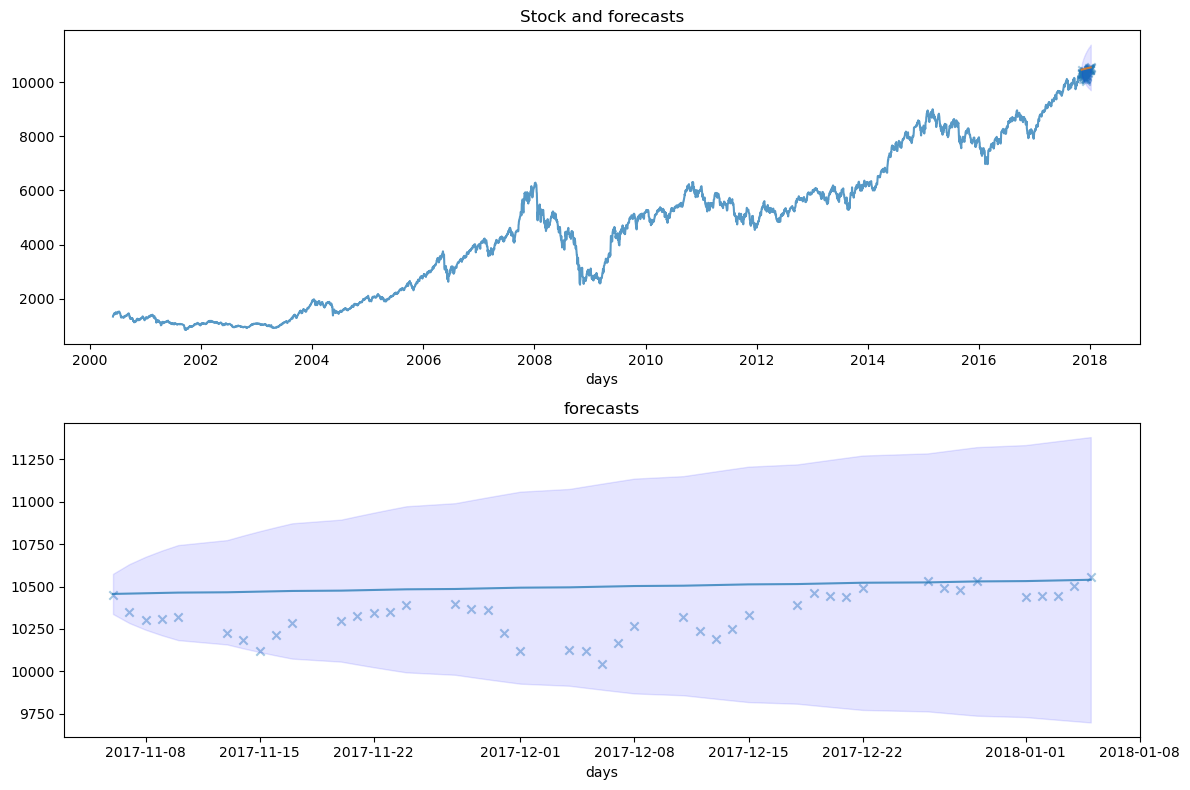

In [135]:
plot_ts_forecast(train_d, test_d, train, test, preds, conf_int)



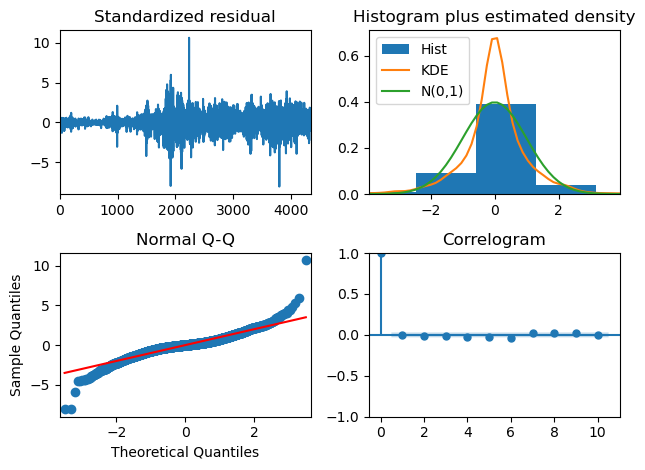

In [137]:
modl1.plot_diagnostics()
plt.tight_layout()

In [138]:
est = pm.ARIMA(order=(1, 1, 0),suppress_warnings=True)
               #seasonal_order=(0, 1, 1, 12),


[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=3 ..........................................................
[CV] fold=4 ..........................................................
[CV] fold=5 ..........................................................
[CV] fold=6 ..........................................................
[CV] fold=7 ..........................................................
[CV] fold=8 ..........................................................
[CV] fold=9 ..........................................................
[CV] fold=10 .........................................................
[CV] fold=11 .........................................................
[CV] fold=12 .........................................................
[CV] fold=13 .........................................................
[CV] f

[CV] fold=118 ........................................................
[CV] fold=119 ........................................................
[CV] fold=120 ........................................................
[CV] fold=121 ........................................................
[CV] fold=122 ........................................................
[CV] fold=123 ........................................................
[CV] fold=124 ........................................................
[CV] fold=125 ........................................................
[CV] fold=126 ........................................................
[CV] fold=127 ........................................................
[CV] fold=128 ........................................................
[CV] fold=129 ........................................................
[CV] fold=130 ........................................................
[CV] fold=131 ........................................................
[CV] f

[CV] fold=235 ........................................................
[CV] fold=236 ........................................................
[CV] fold=237 ........................................................
[CV] fold=238 ........................................................
[CV] fold=239 ........................................................
[CV] fold=240 ........................................................
[CV] fold=241 ........................................................
[CV] fold=242 ........................................................
[CV] fold=243 ........................................................
[CV] fold=244 ........................................................
[CV] fold=245 ........................................................
[CV] fold=246 ........................................................
[CV] fold=247 ........................................................
[CV] fold=248 ........................................................
[CV] f

[CV] fold=353 ........................................................
[CV] fold=354 ........................................................
[CV] fold=355 ........................................................
[CV] fold=356 ........................................................
[CV] fold=357 ........................................................
[CV] fold=358 ........................................................
[CV] fold=359 ........................................................
[CV] fold=360 ........................................................
[CV] fold=361 ........................................................
[CV] fold=362 ........................................................
[CV] fold=363 ........................................................
[CV] fold=364 ........................................................
[CV] fold=365 ........................................................
[CV] fold=366 ........................................................
[CV] f

[CV] fold=471 ........................................................
[CV] fold=472 ........................................................
[CV] fold=473 ........................................................
[CV] fold=474 ........................................................
[CV] fold=475 ........................................................
[CV] fold=476 ........................................................
[CV] fold=477 ........................................................
[CV] fold=478 ........................................................
[CV] fold=479 ........................................................
[CV] fold=480 ........................................................
[CV] fold=481 ........................................................
[CV] fold=482 ........................................................
[CV] fold=483 ........................................................
[CV] fold=484 ........................................................
[CV] f

[CV] fold=587 ........................................................
[CV] fold=588 ........................................................
[CV] fold=589 ........................................................
[CV] fold=590 ........................................................
[CV] fold=591 ........................................................
[CV] fold=592 ........................................................
[CV] fold=593 ........................................................
[CV] fold=594 ........................................................
[CV] fold=595 ........................................................
[CV] fold=596 ........................................................
[CV] fold=597 ........................................................
[CV] fold=598 ........................................................
[CV] fold=599 ........................................................
[CV] fold=600 ........................................................
[CV] f

[CV] fold=703 ........................................................
[CV] fold=704 ........................................................
[CV] fold=705 ........................................................
[CV] fold=706 ........................................................
[CV] fold=707 ........................................................
[CV] fold=708 ........................................................
[CV] fold=709 ........................................................
[CV] fold=710 ........................................................
[CV] fold=711 ........................................................
[CV] fold=712 ........................................................
[CV] fold=713 ........................................................
[CV] fold=714 ........................................................
[CV] fold=715 ........................................................
[CV] fold=716 ........................................................
[CV] f

[CV] fold=820 ........................................................
[CV] fold=821 ........................................................
[CV] fold=822 ........................................................
[CV] fold=823 ........................................................
[CV] fold=824 ........................................................
[CV] fold=825 ........................................................
[CV] fold=826 ........................................................
[CV] fold=827 ........................................................
[CV] fold=828 ........................................................
[CV] fold=829 ........................................................
[CV] fold=830 ........................................................
[CV] fold=831 ........................................................
[CV] fold=832 ........................................................
[CV] fold=833 ........................................................
[CV] f

[CV] fold=937 ........................................................
[CV] fold=938 ........................................................
[CV] fold=939 ........................................................
[CV] fold=940 ........................................................
[CV] fold=941 ........................................................
[CV] fold=942 ........................................................
[CV] fold=943 ........................................................
[CV] fold=944 ........................................................
[CV] fold=945 ........................................................
[CV] fold=946 ........................................................
[CV] fold=947 ........................................................
[CV] fold=948 ........................................................
[CV] fold=949 ........................................................
[CV] fold=950 ........................................................
[CV] f

[CV] fold=1056 .......................................................
[CV] fold=1057 .......................................................


Text(0.5, 1.0, 'Cross-validated stock forecasts')

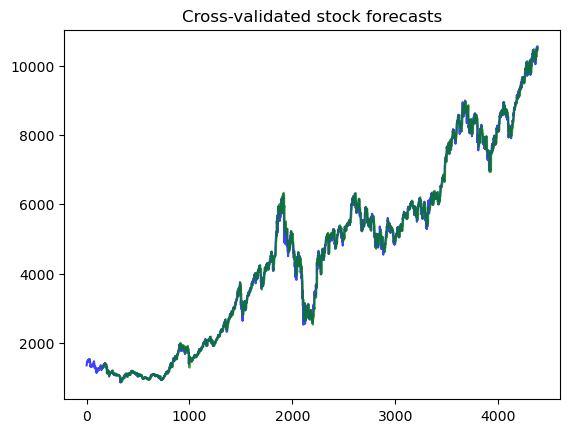

In [139]:
cv = model_selection.SlidingWindowForecastCV(window_size=150, step=4, h=4)
y = ts.values.squeeze()
predictions = model_selection.cross_val_predict(est, y, cv=cv, verbose=2, averaging="median")

# plot the predictions over the original series
x_axis = np.arange(y.shape[0])
n_test = predictions.shape[0]

plt.plot(x_axis, y, alpha=0.75, c='b')
plt.plot(x_axis[-n_test:], predictions, alpha=0.75, c='g')  # Forecasts
plt.title("Cross-validated stock forecasts")

In [141]:
n_test

4232

In [142]:
cv = model_selection.SlidingWindowForecastCV(h=7)
y = ts.values.squeeze()
predictions = model_selection.cross_val_predict(est, y, cv=cv, verbose=2, averaging="median")

# plot the predictions over the original series
x_axis = np.arange(y.shape[0])
n_test = predictions.shape[0]

plt.plot(x_axis, y, alpha=0.75, c='b')
plt.plot(x_axis[-n_test:], predictions, alpha=0.75, c='g')  # Forecasts
plt.title("Cross-validated stock forecasts")
plt.show()

[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=3 ..........................................................
[CV] fold=4 ..........................................................
[CV] fold=5 ..........................................................
[CV] fold=6 ..........................................................
[CV] fold=7 ..........................................................
[CV] fold=8 ..........................................................
[CV] fold=9 ..........................................................
[CV] fold=10 .........................................................
[CV] fold=11 .........................................................
[CV] fold=12 .........................................................
[CV] fold=13 .........................................................
[CV] f

[CV] fold=116 ........................................................
[CV] fold=117 ........................................................
[CV] fold=118 ........................................................
[CV] fold=119 ........................................................
[CV] fold=120 ........................................................
[CV] fold=121 ........................................................
[CV] fold=122 ........................................................
[CV] fold=123 ........................................................
[CV] fold=124 ........................................................
[CV] fold=125 ........................................................
[CV] fold=126 ........................................................
[CV] fold=127 ........................................................
[CV] fold=128 ........................................................
[CV] fold=129 ........................................................
[CV] f

[CV] fold=236 ........................................................
[CV] fold=237 ........................................................
[CV] fold=238 ........................................................
[CV] fold=239 ........................................................
[CV] fold=240 ........................................................
[CV] fold=241 ........................................................
[CV] fold=242 ........................................................
[CV] fold=243 ........................................................
[CV] fold=244 ........................................................
[CV] fold=245 ........................................................
[CV] fold=246 ........................................................
[CV] fold=247 ........................................................
[CV] fold=248 ........................................................
[CV] fold=249 ........................................................
[CV] f

[CV] fold=354 ........................................................
[CV] fold=355 ........................................................
[CV] fold=356 ........................................................
[CV] fold=357 ........................................................
[CV] fold=358 ........................................................
[CV] fold=359 ........................................................
[CV] fold=360 ........................................................
[CV] fold=361 ........................................................
[CV] fold=362 ........................................................
[CV] fold=363 ........................................................
[CV] fold=364 ........................................................
[CV] fold=365 ........................................................
[CV] fold=366 ........................................................
[CV] fold=367 ........................................................
[CV] f

[CV] fold=470 ........................................................
[CV] fold=471 ........................................................
[CV] fold=472 ........................................................
[CV] fold=473 ........................................................
[CV] fold=474 ........................................................
[CV] fold=475 ........................................................
[CV] fold=476 ........................................................
[CV] fold=477 ........................................................
[CV] fold=478 ........................................................
[CV] fold=479 ........................................................
[CV] fold=480 ........................................................
[CV] fold=481 ........................................................
[CV] fold=482 ........................................................
[CV] fold=483 ........................................................
[CV] f

[CV] fold=586 ........................................................
[CV] fold=587 ........................................................
[CV] fold=588 ........................................................
[CV] fold=589 ........................................................
[CV] fold=590 ........................................................
[CV] fold=591 ........................................................
[CV] fold=592 ........................................................
[CV] fold=593 ........................................................
[CV] fold=594 ........................................................
[CV] fold=595 ........................................................
[CV] fold=596 ........................................................
[CV] fold=597 ........................................................
[CV] fold=598 ........................................................
[CV] fold=599 ........................................................
[CV] f

[CV] fold=705 ........................................................
[CV] fold=706 ........................................................
[CV] fold=707 ........................................................
[CV] fold=708 ........................................................
[CV] fold=709 ........................................................
[CV] fold=710 ........................................................
[CV] fold=711 ........................................................
[CV] fold=712 ........................................................
[CV] fold=713 ........................................................
[CV] fold=714 ........................................................
[CV] fold=715 ........................................................
[CV] fold=716 ........................................................
[CV] fold=717 ........................................................
[CV] fold=718 ........................................................
[CV] f

[CV] fold=821 ........................................................
[CV] fold=822 ........................................................
[CV] fold=823 ........................................................
[CV] fold=824 ........................................................
[CV] fold=825 ........................................................
[CV] fold=826 ........................................................
[CV] fold=827 ........................................................
[CV] fold=828 ........................................................
[CV] fold=829 ........................................................
[CV] fold=830 ........................................................
[CV] fold=831 ........................................................
[CV] fold=832 ........................................................
[CV] fold=833 ........................................................
[CV] fold=834 ........................................................
[CV] f

[CV] fold=940 ........................................................
[CV] fold=941 ........................................................
[CV] fold=942 ........................................................
[CV] fold=943 ........................................................
[CV] fold=944 ........................................................
[CV] fold=945 ........................................................
[CV] fold=946 ........................................................
[CV] fold=947 ........................................................
[CV] fold=948 ........................................................
[CV] fold=949 ........................................................
[CV] fold=950 ........................................................
[CV] fold=951 ........................................................
[CV] fold=952 ........................................................
[CV] fold=953 ........................................................
[CV] f

[CV] fold=1056 .......................................................
[CV] fold=1057 .......................................................
[CV] fold=1058 .......................................................
[CV] fold=1059 .......................................................
[CV] fold=1060 .......................................................
[CV] fold=1061 .......................................................
[CV] fold=1062 .......................................................
[CV] fold=1063 .......................................................
[CV] fold=1064 .......................................................
[CV] fold=1065 .......................................................
[CV] fold=1066 .......................................................
[CV] fold=1067 .......................................................
[CV] fold=1068 .......................................................
[CV] fold=1069 .......................................................
[CV] f

[CV] fold=1173 .......................................................
[CV] fold=1174 .......................................................
[CV] fold=1175 .......................................................
[CV] fold=1176 .......................................................
[CV] fold=1177 .......................................................
[CV] fold=1178 .......................................................
[CV] fold=1179 .......................................................
[CV] fold=1180 .......................................................
[CV] fold=1181 .......................................................
[CV] fold=1182 .......................................................
[CV] fold=1183 .......................................................
[CV] fold=1184 .......................................................
[CV] fold=1185 .......................................................
[CV] fold=1186 .......................................................
[CV] f

[CV] fold=1289 .......................................................
[CV] fold=1290 .......................................................
[CV] fold=1291 .......................................................
[CV] fold=1292 .......................................................
[CV] fold=1293 .......................................................
[CV] fold=1294 .......................................................
[CV] fold=1295 .......................................................
[CV] fold=1296 .......................................................
[CV] fold=1297 .......................................................
[CV] fold=1298 .......................................................
[CV] fold=1299 .......................................................
[CV] fold=1300 .......................................................
[CV] fold=1301 .......................................................
[CV] fold=1302 .......................................................
[CV] f

[CV] fold=1406 .......................................................
[CV] fold=1407 .......................................................
[CV] fold=1408 .......................................................
[CV] fold=1409 .......................................................
[CV] fold=1410 .......................................................
[CV] fold=1411 .......................................................
[CV] fold=1412 .......................................................
[CV] fold=1413 .......................................................
[CV] fold=1414 .......................................................
[CV] fold=1415 .......................................................
[CV] fold=1416 .......................................................
[CV] fold=1417 .......................................................
[CV] fold=1418 .......................................................
[CV] fold=1419 .......................................................
[CV] f

KeyboardInterrupt: 

In [145]:
y = ts.values.squeeze()
window_size = y.shape[0] //2


In [146]:
window_size

2192

In [147]:
cv = model_selection.SlidingWindowForecastCV(window_size=window_size, h=7)

predictions = model_selection.cross_val_predict(est, y, cv=cv, verbose=2, averaging="median")


[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=3 ..........................................................
[CV] fold=4 ..........................................................
[CV] fold=5 ..........................................................
[CV] fold=6 ..........................................................
[CV] fold=7 ..........................................................
[CV] fold=8 ..........................................................
[CV] fold=9 ..........................................................
[CV] fold=10 .........................................................
[CV] fold=11 .........................................................
[CV] fold=12 .........................................................
[CV] fold=13 .........................................................
[CV] f

[CV] fold=117 ........................................................
[CV] fold=118 ........................................................
[CV] fold=119 ........................................................
[CV] fold=120 ........................................................
[CV] fold=121 ........................................................
[CV] fold=122 ........................................................
[CV] fold=123 ........................................................
[CV] fold=124 ........................................................
[CV] fold=125 ........................................................
[CV] fold=126 ........................................................
[CV] fold=127 ........................................................
[CV] fold=128 ........................................................
[CV] fold=129 ........................................................
[CV] fold=130 ........................................................
[CV] f

[CV] fold=233 ........................................................
[CV] fold=234 ........................................................
[CV] fold=235 ........................................................
[CV] fold=236 ........................................................
[CV] fold=237 ........................................................
[CV] fold=238 ........................................................
[CV] fold=239 ........................................................
[CV] fold=240 ........................................................
[CV] fold=241 ........................................................
[CV] fold=242 ........................................................
[CV] fold=243 ........................................................
[CV] fold=244 ........................................................
[CV] fold=245 ........................................................
[CV] fold=246 ........................................................
[CV] f

[CV] fold=349 ........................................................
[CV] fold=350 ........................................................
[CV] fold=351 ........................................................
[CV] fold=352 ........................................................
[CV] fold=353 ........................................................
[CV] fold=354 ........................................................
[CV] fold=355 ........................................................
[CV] fold=356 ........................................................
[CV] fold=357 ........................................................
[CV] fold=358 ........................................................
[CV] fold=359 ........................................................
[CV] fold=360 ........................................................
[CV] fold=361 ........................................................
[CV] fold=362 ........................................................
[CV] f

[CV] fold=466 ........................................................
[CV] fold=467 ........................................................
[CV] fold=468 ........................................................
[CV] fold=469 ........................................................
[CV] fold=470 ........................................................
[CV] fold=471 ........................................................
[CV] fold=472 ........................................................
[CV] fold=473 ........................................................
[CV] fold=474 ........................................................
[CV] fold=475 ........................................................
[CV] fold=476 ........................................................
[CV] fold=477 ........................................................
[CV] fold=478 ........................................................
[CV] fold=479 ........................................................
[CV] f

KeyboardInterrupt: 

In [157]:
y = ts.values.squeeze()
step = y.shape[0] //10
window_size = y.shape[0]//2



In [158]:
cv = model_selection.SlidingWindowForecastCV(window_size=window_size, step=step,  h=step)

predictions = model_selection.cross_val_predict(est, y, cv=cv, verbose=2, averaging="median")


[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=3 ..........................................................
[CV] fold=4 ..........................................................


In [161]:
from pmdarima import preprocessing as ppc
from pmdarima import pipeline 
from pmdarima import arima 
 
size = .999
data = ts.values.squeeze()
train, test = model_selection.train_test_split(data, train_size=size)
dates = ts.index.values.squeeze()
train_d, test_d = model_selection.train_test_split(dates, train_size=size)
train_d.shape, test_d.shape


pipe = pipeline.Pipeline([
    ("log", ppc.LogEndogTransformer()),
    ("arima", arima.AutoARIMA(stepwise=True, trace=1, error_action="ignore",
                              seasonal=False, suppress_warnings=True))
])

pipe.fit(train)
print("Model fit:")
print(pipe)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-24694.306, Time=6.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-24667.629, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-24691.704, Time=1.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-24694.322, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-24665.023, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-24698.399, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-24698.641, Time=2.89 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-24700.583, Time=1.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-24698.697, Time=3.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-24696.677, Time=2.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-24698.229, Time=0.49 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 19.219 seconds
Model fit:
Pipeline(steps=[('log', LogEndogTransformer()),
                ('arima',
                 AutoARIMA(error_action='ignor

In [162]:
print(pipe)

Pipeline(steps=[('log', LogEndogTransformer()),
                ('arima',
                 AutoARIMA(error_action='ignore', seasonal=False, trace=1))])


In [163]:
preds, conf_int = model_predict(pipe, train, test)


Test RMSE: 82.964


In [164]:
plot_ts_forecast(train_d, test_d, train, test, preds, conf_int)


In [165]:
test_d

array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
       '2018-01-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [166]:
train_d

array(['2000-06-01T00:00:00.000000000', '2000-06-02T00:00:00.000000000',
       '2000-06-05T00:00:00.000000000', ...,
       '2017-12-27T00:00:00.000000000', '2017-12-28T00:00:00.000000000',
       '2017-12-29T00:00:00.000000000'], dtype='datetime64[ns]')

In [167]:
size = .99
data = ts.values.squeeze()
train, test = model_selection.train_test_split(data, train_size=size)
dates = ts.index.values.squeeze()
train_d, test_d = model_selection.train_test_split(dates, train_size=size)
train_d.shape, test_d.shape

((4341,), (44,))

In [168]:
pipe = pipeline.Pipeline([
    ("log", ppc.LogEndogTransformer()),
    ("arima", arima.AutoARIMA(stepwise=True, trace=1, error_action="ignore",
                              seasonal=False, suppress_warnings=True))
])

pipe.fit(train)
print("Model fit:")
print(pipe)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-24441.614, Time=4.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-24415.660, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-24439.267, Time=1.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-24441.830, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-24413.081, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-24445.832, Time=1.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-24446.033, Time=1.98 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-24447.973, Time=1.65 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-24446.090, Time=1.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-24444.069, Time=2.47 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-24445.642, Time=0.36 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 15.840 seconds
Model fit:
Pipeline(steps=[('log', LogEndogTransformer()),
                ('arima',
                 AutoARIMA(error_action='ignor

In [169]:
preds, conf_int = model_predict(pipe, train, test)


Test RMSE: 256.767


In [170]:
plot_ts_forecast(train_d, test_d, train, test, preds, conf_int)


In [171]:
test_d

array(['2017-11-06T00:00:00.000000000', '2017-11-07T00:00:00.000000000',
       '2017-11-08T00:00:00.000000000', '2017-11-09T00:00:00.000000000',
       '2017-11-10T00:00:00.000000000', '2017-11-13T00:00:00.000000000',
       '2017-11-14T00:00:00.000000000', '2017-11-15T00:00:00.000000000',
       '2017-11-16T00:00:00.000000000', '2017-11-17T00:00:00.000000000',
       '2017-11-20T00:00:00.000000000', '2017-11-21T00:00:00.000000000',
       '2017-11-22T00:00:00.000000000', '2017-11-23T00:00:00.000000000',
       '2017-11-24T00:00:00.000000000', '2017-11-27T00:00:00.000000000',
       '2017-11-28T00:00:00.000000000', '2017-11-29T00:00:00.000000000',
       '2017-11-30T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2017-12-04T00:00:00.000000000', '2017-12-05T00:00:00.000000000',
       '2017-12-06T00:00:00.000000000', '2017-12-07T00:00:00.000000000',
       '2017-12-08T00:00:00.000000000', '2017-12-11T00:00:00.000000000',
       '2017-12-12T00:00:00.000000000', '2017-12-13

In [172]:
ts


Date
2000-06-01     1349.00
2000-06-02     1389.25
2000-06-05     1404.60
2000-06-06     1421.75
2000-06-07     1430.35
                ...   
2018-01-01    10435.55
2018-01-02    10442.20
2018-01-03    10443.20
2018-01-04    10504.80
2018-01-05    10558.85
Name: Close, Length: 4385, dtype: float64

In [173]:
train = ts[:-10]
test = ts[-10:]


In [174]:
train

Date
2000-06-01     1349.00
2000-06-02     1389.25
2000-06-05     1404.60
2000-06-06     1421.75
2000-06-07     1430.35
                ...   
2017-12-15    10333.25
2017-12-18    10388.75
2017-12-19    10463.20
2017-12-20    10444.20
2017-12-21    10440.30
Name: Close, Length: 4375, dtype: float64

In [175]:
test

Date
2017-12-22    10493.00
2017-12-26    10531.50
2017-12-27    10490.75
2017-12-28    10477.90
2017-12-29    10530.70
2018-01-01    10435.55
2018-01-02    10442.20
2018-01-03    10443.20
2018-01-04    10504.80
2018-01-05    10558.85
Name: Close, dtype: float64

In [188]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt


ts = dft.loc[:, "Close"].asfreq("D", method='ffill')

train = ts[:-10]
test = ts[-10:]


fig = plt.figure(figsize=(12,8))
model = smt.ARIMA(train, order=(2, 1, 1))  
res = model.fit()   #disp:If True, convergence information is output.
ax1 = fig.add_subplot(311)
ax1.plot(train, color="blue", marker="x")
ax1.plot(res.fittedvalues, color='red')
ax1.set_title('MSE: %.4f'% np.mean((res.fittedvalues-train)**2))

C:\Anaconda310\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda310\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Text(0.5, 1.0, 'MSE: 2790.0453')

In [189]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 6418
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -34217.611
Date:                Tue, 06 Jun 2023   AIC                          68443.221
Time:                        14:33:37   BIC                          68470.288
Sample:                    06-01-2000   HQIC                         68452.589
                         - 12-26-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7277      0.165     -4.422      0.000      -1.050      -0.405
ar.L2         -0.0058      0.010     -0.581      0.561      -0.026       0.014
ma.L1          0.7416      0.164      4.512      0.000       0.419       1.064
sigma2      2506.7410     16.401    152.840      0.000    2474.595    2538.887
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             43166.35
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               9.31   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [190]:
predict_arima = res.forecast(steps=test.shape[0]) #returns forecast,stderr, confInterval


In [191]:
predict_arima

2017-12-27    10532.187246
2017-12-28    10531.461985
2017-12-29    10531.985773
2017-12-30    10531.608829
2017-12-31    10531.880086
2018-01-01    10531.684883
2018-01-02    10531.825356
2018-01-03    10531.724269
2018-01-04    10531.797013
2018-01-05    10531.744665
Freq: D, Name: predicted_mean, dtype: float64

In [194]:
str(test.index[-1])

'2018-01-05 00:00:00'

In [195]:
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots(figsize=(10, 8))
fig = plot_predict(res, start=str(test.index[0]), end=str(test.index[-1]), ax=ax)
legend = ax.legend(loc="upper left")


In [197]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=20)


In [198]:
preds = res.forecast(steps=test.shape[0]) #returns forecast,
#mean_squared_error from pmdarima
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))


Test RMSE: 55.825


In [199]:
print("Train RMSE: %.3f" % np.sqrt(mean_squared_error(train, res.fittedvalues)))


Train RMSE: 52.821


C:\Anaconda310\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Train RMSE: 0.091
Test RMSE: 0.005


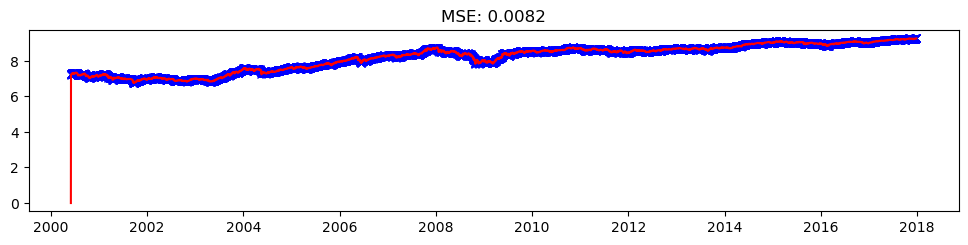

In [200]:
ts = np.log(dft.loc[:, "Close"].asfreq("D", method='ffill'))

train = ts[:-10]
test = ts[-10:]


fig = plt.figure(figsize=(12,8))
model = smt.ARIMA(train, order=(2, 1, 0))  
res = model.fit()   
ax1 = fig.add_subplot(311)
ax1.plot(train, color="blue", marker="x")
ax1.plot(res.fittedvalues, color='red')
ax1.set_title('MSE: %.4f'% np.mean((res.fittedvalues-train)**2))
print("Train RMSE: %.3f" % np.sqrt(mean_squared_error(train, res.fittedvalues)))

#get summary 
res.summary()
preds = res.forecast(steps=test.shape[0]) #returns forecast,
#mean_squared_error from pmdarima
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))
#RMSE: 55.825

In [202]:
pd.concat([test, preds], axis=1)


Close  predicted_mean
2017-12-27  9.258249        9.262142
2017-12-28  9.257024        9.262078
2017-12-29  9.262050        9.262077
2017-12-30  9.262050        9.262078
2017-12-31  9.262050        9.262078
2018-01-01  9.252974        9.262078
2018-01-02  9.253611        9.262078
2018-01-03  9.253706        9.262078
2018-01-04  9.259588        9.262078
2018-01-05  9.264720        9.262078

In [203]:
pd.concat([test, preds], axis=1).apply(np.exp)


Close  predicted_mean
2017-12-27  10490.75    10531.668058
2017-12-28  10477.90    10530.991414
2017-12-29  10530.70    10530.985515
2017-12-30  10530.70    10530.997372
2017-12-31  10530.70    10530.997527
2018-01-01  10435.55    10530.997320
2018-01-02  10442.20    10530.997316
2018-01-03  10443.20    10530.997320
2018-01-04  10504.80    10530.997320
2018-01-05  10558.85    10530.997320

In [204]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 6418
Model:                 ARIMA(2, 1, 0)   Log Likelihood               19300.825
Date:                Tue, 06 Jun 2023   AIC                         -38595.650
Time:                        14:53:13   BIC                         -38575.350
Sample:                    06-01-2000   HQIC                        -38588.624
                         - 12-26-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0044      0.007      0.631      0.528      -0.009       0.018
ar.L2         -0.0176      0.008     -2.138      0.032      -0.034      -0.001
sigma2         0.0001    8.6e-07    166.031      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             63497.75
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Anaconda310\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda310\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Train RMSE: 0.091
Test RMSE: 0.005


Close  predicted_mean
2017-12-27  10490.75    10531.500045
2017-12-28  10477.90    10531.500045
2017-12-29  10530.70    10531.500045
2017-12-30  10530.70    10531.500045
2017-12-31  10530.70    10531.500045
2018-01-01  10435.55    10531.500045
2018-01-02  10442.20    10531.500045
2018-01-03  10443.20    10531.500045
2018-01-04  10504.80    10531.500045
2018-01-05  10558.85    10531.500045

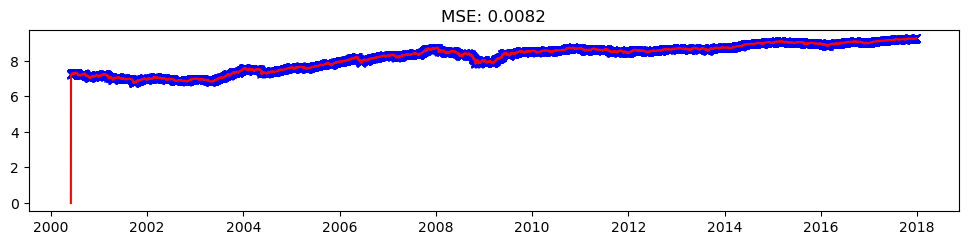

In [205]:
fig = plt.figure(figsize=(12,8))
model = smt.ARIMA(train, order=(1, 1, 1))  
res = model.fit()   
ax1 = fig.add_subplot(311)
ax1.plot(train, color="blue", marker="x")
ax1.plot(res.fittedvalues, color='red')
ax1.set_title('MSE: %.4f'% np.mean((res.fittedvalues-train)**2))
print("Train RMSE: %.3f" % np.sqrt(mean_squared_error(train, res.fittedvalues)))

#get summary 
res.summary()
preds = res.forecast(steps=test.shape[0]) #returns forecast,
#mean_squared_error from pmdarima
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))
#RMSE: 55.825
pd.concat([test, preds], axis=1).apply(np.exp)


In [206]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 6418
Model:                 ARIMA(1, 1, 1)   Log Likelihood               19299.777
Date:                Tue, 06 Jun 2023   AIC                         -38593.553
Time:                        14:54:49   BIC                         -38573.253
Sample:                    06-01-2000   HQIC                        -38586.527
                         - 12-26-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       5.817e-07      0.003      0.000      1.000      -0.007       0.007
ma.L1       5.804e-07      0.003      0.000      1.000      -0.007       0.007
sigma2         0.0001   8.58e-07    166.517      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             63044.90
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.09e+16. Standard errors may be unstable.
"""